In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
palette = sns.color_palette("bright", 3)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as shc

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [5]:
On_Time_Performance = pd.read_csv('On_Time_Performance.csv')
On_Time_Performance = On_Time_Performance[On_Time_Performance['Facility']=='JFK']
On_Time_Performance['Date'] = pd.to_datetime(On_Time_Performance['Date'], errors='coerce')
On_Time_Performance = On_Time_Performance.reset_index()

In [6]:
On_Time_Performance['month'] = On_Time_Performance['Date'].dt.month
On_Time_Performance['weekday'] = On_Time_Performance['Date'].dt.dayofweek

In [7]:
On_Time_Performance['weekday_split'] = 0
On_Time_Performance.loc[On_Time_Performance['weekday'] >= 5, 'weekday_split'] = 1

In [8]:
On_Time_Performance

,index,Facility,Date,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,...,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,weekday,weekday_split
0,4172,JFK,2019-06-01,0.0,8.0,10.0,9.0,20.0,66.67,55.56,...,22.33,5.27,19.11,6.00,3.07,11.65,34.20,6,5,1
1,4173,JFK,2019-06-01,1.0,8.0,3.0,8.0,6.0,75.00,62.50,...,21.38,4.75,12.50,7.00,4.35,12.00,17.83,6,5,1
2,4174,JFK,2019-06-01,2.0,5.0,2.0,5.0,1.0,100.00,100.00,...,16.00,1.08,1.00,0.00,6.70,2.00,13.00,6,5,1
3,4175,JFK,2019-06-01,3.0,2.0,3.0,0.0,2.0,0.00,0.00,...,0.00,0.00,0.00,6.00,5.70,3.00,33.00,6,5,1
4,4176,JFK,2019-06-01,4.0,1.0,1.0,2.0,0.0,100.00,100.00,...,16.50,1.20,1.00,0.00,0.00,0.00,0.00,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,6375,JFK,2019-08-31,19.0,40.0,24.0,39.0,25.0,64.10,56.41,...,23.62,6.22,17.64,3.48,10.77,4.24,17.48,8,5,1
2204,6376,JFK,2019-08-31,20.0,32.0,38.0,32.0,38.0,68.75,65.63,...,20.75,3.97,21.31,4.13,5.89,1.71,19.29,8,5,1
2205,6377,JFK,2019-08-31,21.0,32.0,20.0,31.0,20.0,80.65,77.42,...,19.65,2.91,17.42,0.65,8.27,0.80,22.05,8,5,1
2206,6378,JFK,2019-08-31,22.0,26.0,41.0,25.0,38.0,76.00,72.00,...,21.44,4.98,42.00,3.05,4.47,1.84,13.05,8,5,1


In [9]:
del On_Time_Performance['index']
del On_Time_Performance['Facility']
del On_Time_Performance['Date']
On_Time_Performance

,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,weekday,weekday_split
0,0.0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,5.27,19.11,6.00,3.07,11.65,34.20,6,5,1
1,1.0,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,4.75,12.50,7.00,4.35,12.00,17.83,6,5,1
2,2.0,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,1.08,1.00,0.00,6.70,2.00,13.00,6,5,1
3,3.0,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,0.00,0.00,6.00,5.70,3.00,33.00,6,5,1
4,4.0,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,1.20,1.00,0.00,0.00,0.00,0.00,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,19.0,40.0,24.0,39.0,25.0,64.10,56.41,80.00,13.59,23.62,6.22,17.64,3.48,10.77,4.24,17.48,8,5,1
2204,20.0,32.0,38.0,32.0,38.0,68.75,65.63,76.32,18.44,20.75,3.97,21.31,4.13,5.89,1.71,19.29,8,5,1
2205,21.0,32.0,20.0,31.0,20.0,80.65,77.42,70.00,15.94,19.65,2.91,17.42,0.65,8.27,0.80,22.05,8,5,1
2206,22.0,26.0,41.0,25.0,38.0,76.00,72.00,81.58,38.04,21.44,4.98,42.00,3.05,4.47,1.84,13.05,8,5,1


In [10]:
On_Time_Performance['80% or More On Time'] = 0
On_Time_Performance.loc[On_Time_Performance['% On-Time Gate Arrivals'] >= 80, '80% or More On Time'] = 1

## Peak hours from 6 am - 9 am, 3 pm - 6 pm, 8 pm - 1 am and others as off-peak hours to get %80 on-time gate arrival average¶

In [11]:
def hour_split_for_on_time_gate_arrival(hour):
    if hour >= 6 and hour <= 9:
        return "peak_hours"
    if hour >= 15 and hour <=18:
        return "peak_hours"
    if hour >=20 or hour <=1:
        return "peak_hours"
    else:
        return "off_peak_hours"

In [12]:
On_Time_Performance['Hour_split_for_on_time_gate_arrival'] = On_Time_Performance['Hour'].map(hour_split_for_on_time_gate_arrival)

In [13]:
On_Time_Performance.head()

,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,...,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,weekday,weekday_split,80% or More On Time,Hour_split_for_on_time_gate_arrival
0,0.0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,...,19.11,6.0,3.07,11.65,34.20,6,5,1,0,peak_hours
1,1.0,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,...,12.50,7.0,4.35,12.00,17.83,6,5,1,0,peak_hours
2,2.0,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,...,1.00,0.0,6.70,2.00,13.00,6,5,1,1,off_peak_hours
3,3.0,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,...,0.00,6.0,5.70,3.00,33.00,6,5,1,0,off_peak_hours
4,4.0,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,...,1.00,0.0,0.00,0.00,0.00,6,5,1,0,off_peak_hours


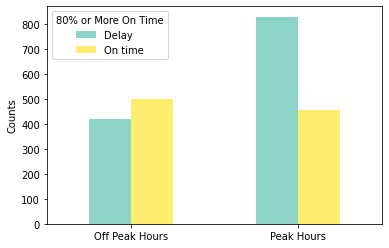

In [14]:
ax = On_Time_Performance.groupby(['Hour_split_for_on_time_gate_arrival', '80% or More On Time'])['80% or More On Time'].count().unstack().plot.bar(colormap = 'Set3')
ax.set_xticklabels(['Off Peak Hours', 'Peak Hours'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Counts")
ax.set_xlabel("")
ax.legend(labels = ['Delay', 'On time'], loc='best', title="80% or More On Time", fancybox = True)

Text(0.5, 0, '')

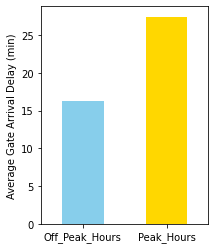

In [15]:
plt.figure(figsize=(3, 4))
ax = On_Time_Performance.groupby(['Hour_split_for_on_time_gate_arrival'])['Average Gate Arrival Delay'].mean().plot.bar(color=['skyblue','gold'], width=0.5)
ax.set_xticklabels(['Off_Peak_Hours', 'Peak_Hours'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Average Gate Arrival Delay (min)")
ax.set_xlabel("")

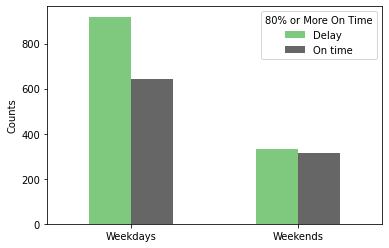

In [16]:
ax = On_Time_Performance.groupby(['weekday_split', '80% or More On Time'])['80% or More On Time'].count().unstack().plot.bar(colormap = 'Accent')
ax.set_xticklabels(['Weekdays', 'Weekends'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Counts")
ax.set_xlabel("")
ax.legend(labels = ['Delay', 'On time'], loc='best', title="80% or More On Time", fancybox = True)

Text(0.5, 0, '')

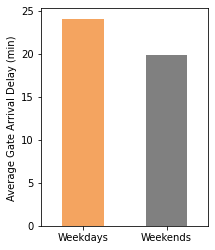

In [17]:
plt.figure(figsize=(3, 4))
ax = On_Time_Performance.groupby(['weekday_split'])['Average Gate Arrival Delay'].mean().plot.bar(color = ['sandybrown', 'gray'], width=0.5)

ax.set_xticklabels(['Weekdays', 'Weekends'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Average Gate Arrival Delay (min)")
ax.set_xlabel("")
#ax.legend_.remove()

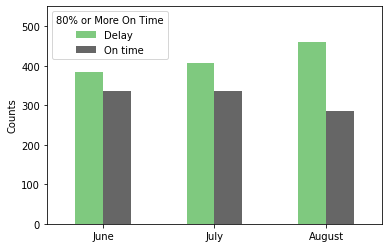

In [18]:

ax = On_Time_Performance.groupby(['month', '80% or More On Time'])['80% or More On Time'].count().unstack().plot.bar(cmap='Accent')
#sns.barplot(x="month", y="Counts", hue="80% or More On Time", data=ax)
ax.set_xticklabels(['June', 'July', 'August'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Counts")
ax.set_ylim(0, 550)
ax.set_xlabel("")
ax.legend(labels = ['Delay', 'On time'], loc='best', title="80% or More On Time", fancybox = True)

Text(0.5, 0, '')

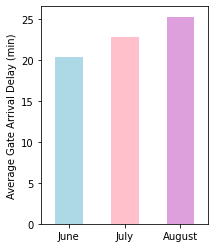

In [19]:
plt.figure(figsize=(3, 4))
ax = On_Time_Performance.groupby(['month'])['Average Gate Arrival Delay'].mean().plot.bar(color = ['lightblue', 'pink', 'plum'], width=0.5)
ax.set_xticklabels(['June', 'July', 'August'], rotation = 0, horizontalalignment="center")
ax.set_ylabel("Average Gate Arrival Delay (min)")
ax.set_xlabel('')

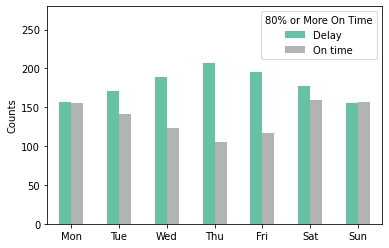

In [20]:
ax = On_Time_Performance.groupby(['weekday', '80% or More On Time'])['80% or More On Time'].count().unstack().plot.bar(colormap='Set2')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0, horizontalalignment="center")
ax.set_ylabel("Counts")
ax.set_ylim(0, 280)
ax.set_xlabel("")
ax.legend(labels = ['Delay', 'On time'], loc='best', title="80% or More On Time", fancybox = True)

Text(0.5, 0, '')

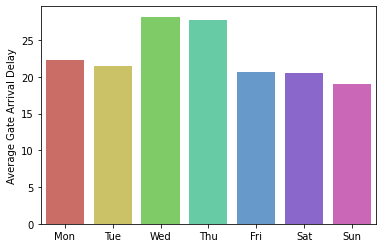

In [21]:
ax = On_Time_Performance.groupby(['weekday'])['Average Gate Arrival Delay'].mean()
ax = pd.DataFrame(ax)
ax = ax.reset_index()
ax_weekday = sns.barplot(x = 'weekday', y = 'Average Gate Arrival Delay', hue = 'weekday', data = ax,
            palette = 'hls',
            #order = ['male', 'female'],  
            #capsize = 0.05,             
            #saturation = 8, 
            dodge=False)
ax_weekday.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0, horizontalalignment="center")
ax_weekday.legend_.remove()
ax_weekday.set_xlabel('')
#ax_weekday.legend(labels = ['Delay', 'On time'], bbox_to_anchor=(1.4, 0.5), title="80% or More On Time", fancybox = Tr

## Silhouette_scores

In [22]:
On_Time_Performance

,Hour,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,...,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,month,weekday,weekday_split,80% or More On Time,Hour_split_for_on_time_gate_arrival
0,0.0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,...,19.11,6.00,3.07,11.65,34.20,6,5,1,0,peak_hours
1,1.0,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,...,12.50,7.00,4.35,12.00,17.83,6,5,1,0,peak_hours
2,2.0,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,...,1.00,0.00,6.70,2.00,13.00,6,5,1,1,off_peak_hours
3,3.0,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,...,0.00,6.00,5.70,3.00,33.00,6,5,1,0,off_peak_hours
4,4.0,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,...,1.00,0.00,0.00,0.00,0.00,6,5,1,0,off_peak_hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,19.0,40.0,24.0,39.0,25.0,64.10,56.41,80.00,13.59,23.62,...,17.64,3.48,10.77,4.24,17.48,8,5,1,1,off_peak_hours
2204,20.0,32.0,38.0,32.0,38.0,68.75,65.63,76.32,18.44,20.75,...,21.31,4.13,5.89,1.71,19.29,8,5,1,0,peak_hours
2205,21.0,32.0,20.0,31.0,20.0,80.65,77.42,70.00,15.94,19.65,...,17.42,0.65,8.27,0.80,22.05,8,5,1,0,peak_hours
2206,22.0,26.0,41.0,25.0,38.0,76.00,72.00,81.58,38.04,21.44,...,42.00,3.05,4.47,1.84,13.05,8,5,1,1,peak_hours


In [23]:
On_Time_Performance_0 = On_Time_Performance.drop(['Hour','month', 'weekday', 'weekday_split', '80% or More On Time','Hour_split_for_on_time_gate_arrival'],axis=1)
X = On_Time_Performance_0

In [24]:
X

,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,% On-Time Gate Arrivals,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay
0,8.0,10.0,9.0,20.0,66.67,55.56,40.00,15.11,22.33,5.27,19.11,6.00,3.07,11.65,34.20
1,8.0,3.0,8.0,6.0,75.00,62.50,66.67,9.38,21.38,4.75,12.50,7.00,4.35,12.00,17.83
2,5.0,2.0,5.0,1.0,100.00,100.00,100.00,0.80,16.00,1.08,1.00,0.00,6.70,2.00,13.00
3,2.0,3.0,0.0,2.0,0.00,0.00,50.00,0.00,0.00,0.00,0.00,6.00,5.70,3.00,33.00
4,1.0,1.0,2.0,0.0,100.00,100.00,0.00,2.50,16.50,1.20,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,40.0,24.0,39.0,25.0,64.10,56.41,80.00,13.59,23.62,6.22,17.64,3.48,10.77,4.24,17.48
2204,32.0,38.0,32.0,38.0,68.75,65.63,76.32,18.44,20.75,3.97,21.31,4.13,5.89,1.71,19.29
2205,32.0,20.0,31.0,20.0,80.65,77.42,70.00,15.94,19.65,2.91,17.42,0.65,8.27,0.80,22.05
2206,26.0,41.0,25.0,38.0,76.00,72.00,81.58,38.04,21.44,4.98,42.00,3.05,4.47,1.84,13.05


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)

###  Silhouette_scores by K-means

For n_clusters = 2 The average silhouette_score is : 0.25980135086516787
For n_clusters = 3 The average silhouette_score is : 0.280807267954992
For n_clusters = 4 The average silhouette_score is : 0.24045548304681338
For n_clusters = 5 The average silhouette_score is : 0.250030958969639
For n_clusters = 6 The average silhouette_score is : 0.22755310340086315


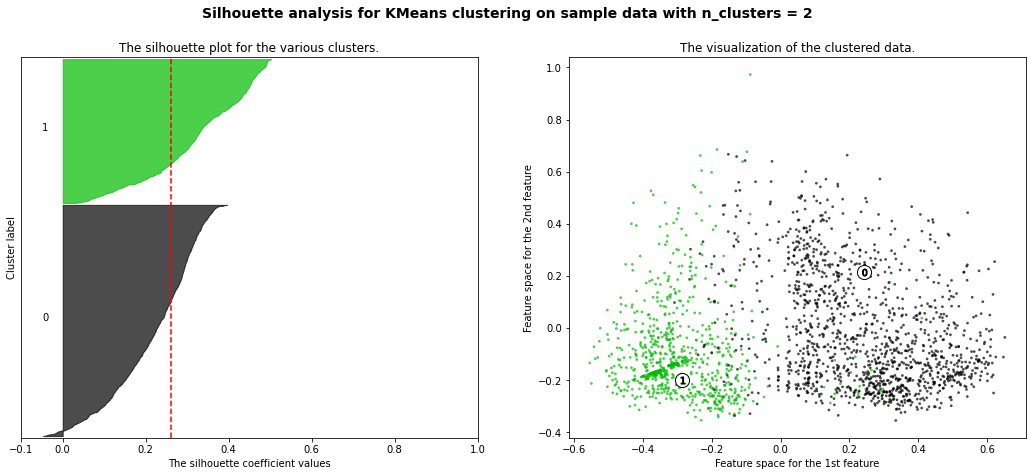

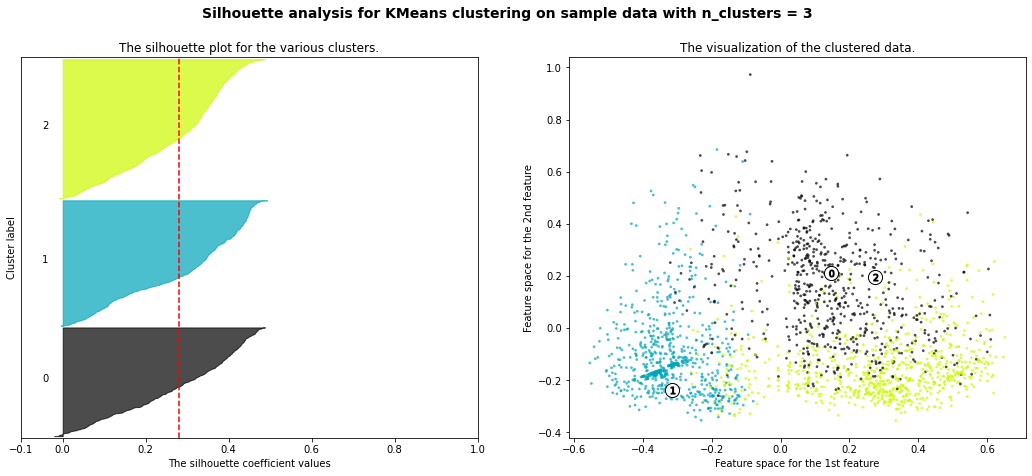

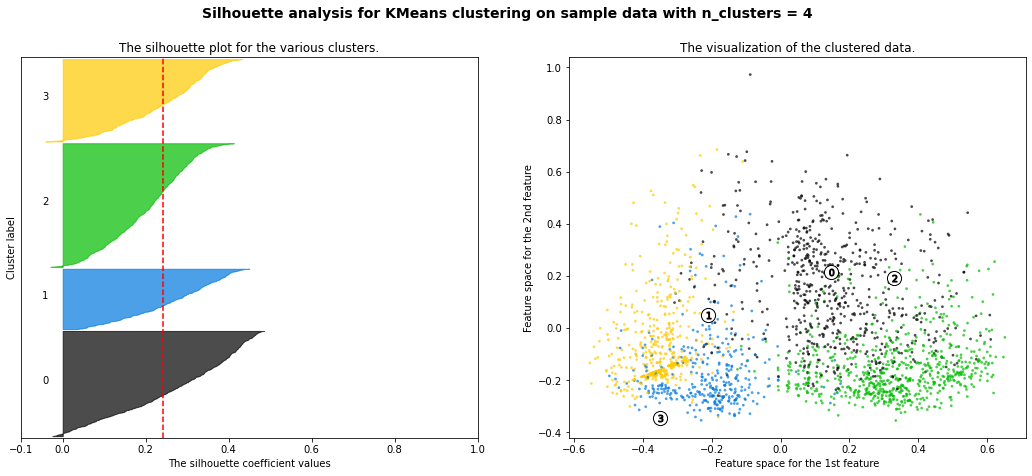

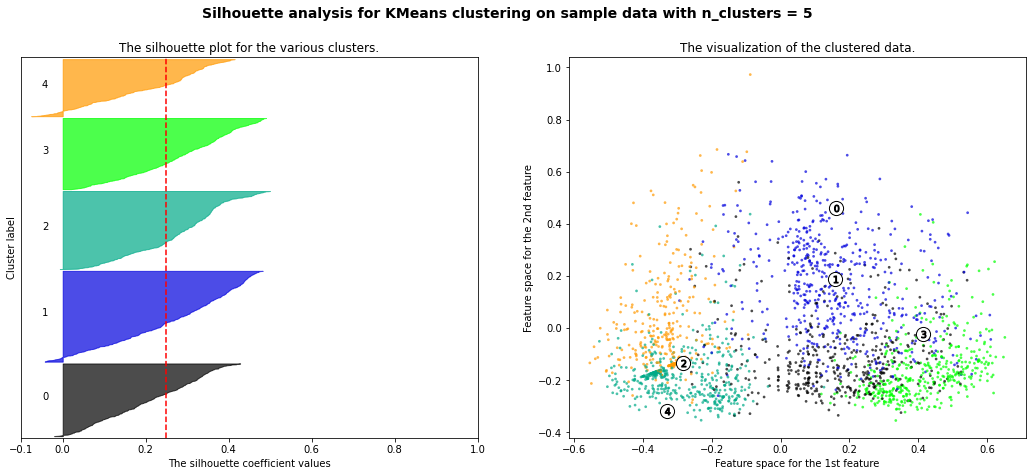

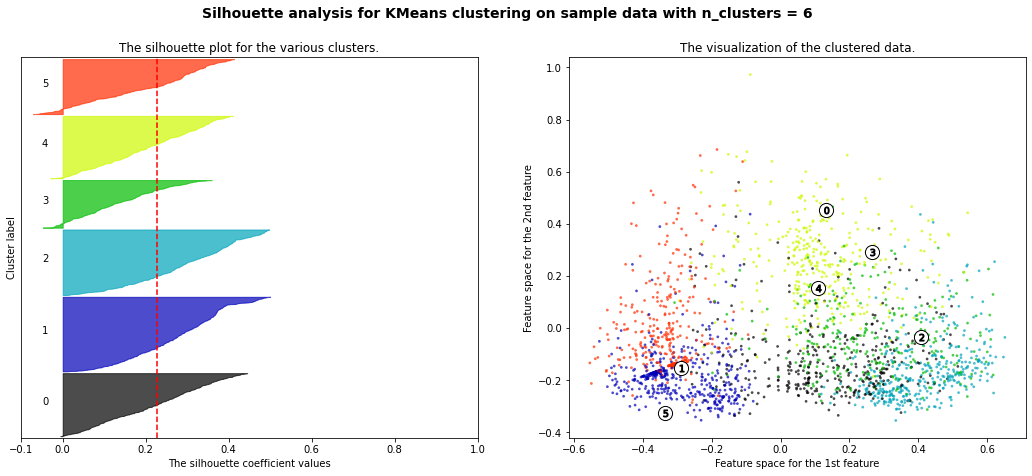

In [26]:
# the following code is from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_normalized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_normalized[:, 0], X_normalized[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

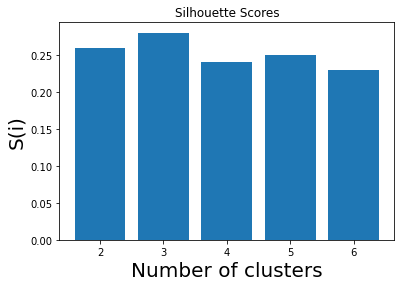

In [27]:
k = [2, 3, 4, 5, 6]
silhouette_scores = [0.26, 0.28, 0.24, 0.25, 0.23]
plt.bar(k, silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

## LDA analysis
###  First hour split 

In [28]:
On_Time_Performance_1 = On_Time_Performance.drop(['Hour','month', 'weekday', 'weekday_split', '80% or More On Time', 'Hour_split_for_on_time_gate_arrival'],axis=1)

In [29]:
def OnTime_performance_split(pencentage):
    if pencentage >= 80:
        return "0"
    if pencentage >= 50 and pencentage < 80:
        return "1"
    else:
        return "2"

In [30]:
On_Time_Performance_1['% OnTime_gate_arrival_split'] = On_Time_Performance_1['% On-Time Gate Arrivals'].map(OnTime_performance_split)

In [31]:
del On_Time_Performance_1['% On-Time Gate Arrivals']

In [32]:
y = On_Time_Performance_1['% OnTime_gate_arrival_split'].values
X = On_Time_Performance_1.drop(['% OnTime_gate_arrival_split'],axis=1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
X_train_normalized = normalize(X_train_std)
X_test_normalized = normalize(X_test_std)

In [36]:
X = LDA(n_components=2)
X_train_lda = X.fit_transform(X_train_normalized, y_train)

In [37]:
y_pred = X.predict(X_test_normalized)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       271
           1       0.76      0.61      0.68       308
           2       0.70      0.69      0.69        84

    accuracy                           0.72       663
   macro avg       0.72      0.72      0.71       663
weighted avg       0.72      0.72      0.72       663



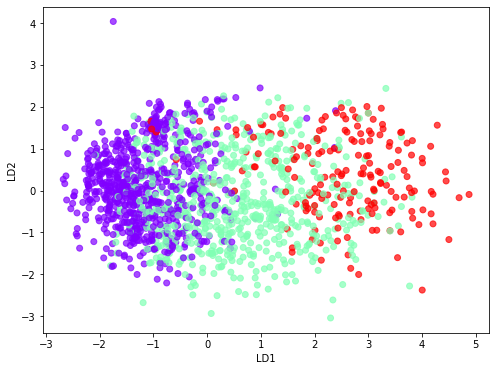

In [39]:
plt.figure(figsize=(8, 6))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_train_lda[:,0],
    X_train_lda[:,1],
    c = y_train.astype(int),
    cmap='rainbow',
    alpha=0.7,
    #edgecolors='b'
)

### LDA  second hour split

In [40]:
On_Time_Performance_2 = On_Time_Performance.drop(['Hour','month', 'weekday', 'weekday_split', '80% or More On Time', 'Hour_split_for_on_time_gate_arrival'],axis=1)

In [41]:
def OnTime_performance_split(pencentage):
    if pencentage >= 80:
        return "0"
    if pencentage >= 10 and pencentage < 80:
        return "1"
    else:
        return "2"

In [42]:
On_Time_Performance_2['% OnTime_gate_arrival_split'] = On_Time_Performance_2['% On-Time Gate Arrivals'].map(OnTime_performance_split)

In [43]:
del On_Time_Performance_2['% On-Time Gate Arrivals']

In [44]:
y = On_Time_Performance_2['% OnTime_gate_arrival_split'].values
X = On_Time_Performance_2.drop(['% OnTime_gate_arrival_split'],axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [47]:
X_train_normalized = normalize(X_train_std)
X_test_normalized = normalize(X_test_std)

In [48]:
X = LDA(n_components=2)
X_train_lda = X.fit_transform(X_train_normalized, y_train)

In [49]:
y_pred = X.predict(X_test_normalized)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       271
           1       0.86      0.74      0.79       377
           2       0.00      0.00      0.00        15

    accuracy                           0.78       663
   macro avg       0.52      0.54      0.52       663
weighted avg       0.77      0.78      0.77       663



/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


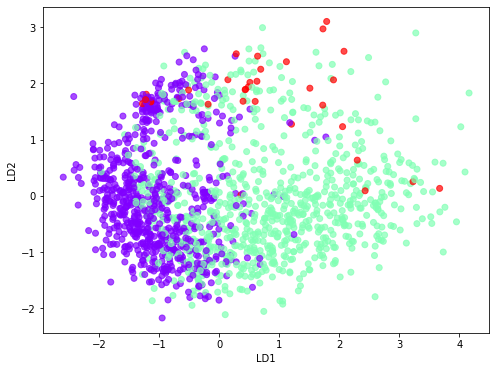

In [51]:
plt.figure(figsize=(8, 6))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_train_lda[:,0],
    X_train_lda[:,1],
    c = y_train.astype(int),
    cmap='rainbow',
    alpha=0.7,
    #edgecolors='b'
)

## LDA for the Binary analysis

In [52]:
On_Time_Performance_3= On_Time_Performance.drop(['Hour','month', 'weekday', 'weekday_split','% On-Time Gate Arrivals', 'Hour_split_for_on_time_gate_arrival'],axis=1)
On_Time_Performance_3

,Scheduled Departures,Scheduled Arrivals,Departures For Metric Computation,Arrivals For Metric Computation,% On-Time Gate Departures,% On-Time Airport Departures,Average Gate Departure Delay,Average Taxi Out Time,Average Taxi Out Delay,Average Airport Departure Delay,Average Airborne Delay,Average Taxi In Delay,Average Block Delay,Average Gate Arrival Delay,80% or More On Time
0,8.0,10.0,9.0,20.0,66.67,55.56,15.11,22.33,5.27,19.11,6.00,3.07,11.65,34.20,0
1,8.0,3.0,8.0,6.0,75.00,62.50,9.38,21.38,4.75,12.50,7.00,4.35,12.00,17.83,0
2,5.0,2.0,5.0,1.0,100.00,100.00,0.80,16.00,1.08,1.00,0.00,6.70,2.00,13.00,1
3,2.0,3.0,0.0,2.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,5.70,3.00,33.00,0
4,1.0,1.0,2.0,0.0,100.00,100.00,2.50,16.50,1.20,1.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,40.0,24.0,39.0,25.0,64.10,56.41,13.59,23.62,6.22,17.64,3.48,10.77,4.24,17.48,1
2204,32.0,38.0,32.0,38.0,68.75,65.63,18.44,20.75,3.97,21.31,4.13,5.89,1.71,19.29,0
2205,32.0,20.0,31.0,20.0,80.65,77.42,15.94,19.65,2.91,17.42,0.65,8.27,0.80,22.05,0
2206,26.0,41.0,25.0,38.0,76.00,72.00,38.04,21.44,4.98,42.00,3.05,4.47,1.84,13.05,1


In [53]:
y = On_Time_Performance_3['80% or More On Time']
X = On_Time_Performance_3.drop(['80% or More On Time'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [56]:
X_train_normallized = normalize(X_train_std)
X_test_normallized = normalize(X_test_std)

In [57]:
X_train_std.shape

(1545, 14)

In [58]:
clf = LDA(n_components=1)

In [59]:
clf.fit(X_train_normalized, y_train)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [60]:
y_pred = clf.predict(X_test_normalized)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       392
           1       0.70      0.87      0.77       271

    accuracy                           0.79       663
   macro avg       0.79      0.80      0.79       663
weighted avg       0.81      0.79      0.80       663



In [62]:
y_pred_score = clf.predict_proba(X_test_normalized)

In [63]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_score[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8948057082611642

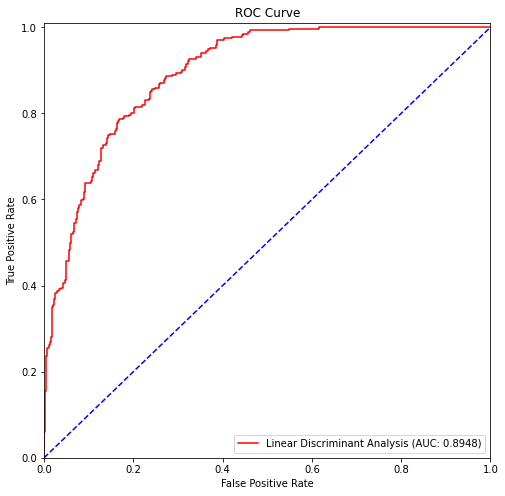

In [64]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Linear Discriminant Analysis (AUC: %.4f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()